1. Building the database with the indicator: The indicator is estimated dividing each daily case between the total population by year by country and multiplying by 100.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
#the database with the daily cases by country
database= pd.read_csv("/Users/linaruiz/Documents/projectEpidemicCurve/data/uncover_countries.csv")
database1 = database[["Date_reported","Country_code","Country","New_cases"]] 
database1.head()

,Date_reported,Country_code,Country,New_cases
0,2020-01-03,BE,Belgium,0
1,2020-01-04,BE,Belgium,0
2,2020-01-05,BE,Belgium,0
3,2020-01-06,BE,Belgium,0
4,2020-01-07,BE,Belgium,0


In [77]:
#building the year coulmn for each Date_reported
database1["Year"] = database1.apply(lambda x : x["Date_reported"][0:4], axis = 1)
database1.head()

/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_64831/1749575765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database1["Year"] = database1.apply(lambda x : x["Date_reported"][0:4], axis = 1)


,Date_reported,Country_code,Country,New_cases,Year
0,2020-01-03,BE,Belgium,0,2020
1,2020-01-04,BE,Belgium,0,2020
2,2020-01-05,BE,Belgium,0,2020
3,2020-01-06,BE,Belgium,0,2020
4,2020-01-07,BE,Belgium,0,2020


In [ ]:
# The database with the total population by year by country from: https://data.worldbank.org/indicator/SP.POP.TOTL
#MISSING THE 2022 POPULATION BY COUNTRY
databaseC= pd.read_csv("/Users/linaruiz/Documents/projectEpidemicCurve/data/CountriesPop.csv").reset_index(drop=True)
databaseC.head()

,Country Name,2020,2021,2022
0,Aruba,106585.0,106537.0,106537.0
1,Africa Eastern and Southern,685112705.0,702976832.0,702976832.0
2,Afghanistan,38972230.0,40099462.0,40099462.0
3,Africa Western and Central,466189102.0,478185907.0,478185907.0
4,Angola,33428486.0,34503774.0,34503774.0


In [78]:
#reordering the total population by year by country 
database2 = databaseC.melt(id_vars="Country Name", var_name="Year", value_name="Population")
database2.sort_values("Country Name", inplace=True)
database2.reset_index(drop=True, inplace=True)
database2

,Country Name,Year,Population
0,Afghanistan,2020,38972230.0
1,Afghanistan,2021,40099462.0
2,Afghanistan,2022,40099462.0
3,Africa Eastern and Southern,2020,685112705.0
4,Africa Eastern and Southern,2021,702976832.0
...,...,...,...
793,Zambia,2021,19473125.0
794,Zambia,2020,18927715.0
795,Zimbabwe,2020,15669666.0
796,Zimbabwe,2021,15993524.0


In [79]:
# homogenization of the countries names
database2 = database2.rename(columns = {"Country Name":"Country"})
np.setdiff1d(np.array(database1["Country"].unique()),np.array(database2["Country"].unique()))

array(['Republic of Korea', 'The United Kingdom', 'Türkiye',
       'United States of America'], dtype=object)

In [ ]:
def looking (pattern):
    return list(filter(lambda x : pattern in x, database2["Country"].unique()))

In [ ]:
#np.vectorize(looking)("orea","ingdom","rkiye","merica")

In [ ]:
looking("orea")

["Korea, Dem. People's Rep.", 'Korea, Rep.']

In [ ]:
looking("ingdom")

['United Kingdom']

In [ ]:
looking("rkiye")

['Turkiye']

In [ ]:
looking("merica")

['American Samoa',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'North America']

In [ ]:
looking("tates")

['Caribbean small states',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'United States']

In [ ]:
old_strings = ['Korea, Rep.', 'United Kingdom', 'Turkiye','United States']
new_strings = ['Republic of Korea', 'The United Kingdom', 'Türkiye',
       'United States of America']

In [ ]:
database2["Country"] = database2["Country"].replace(old_strings,new_strings)

In [ ]:
np.setdiff1d(np.array(database1["Country"].unique()),np.array(database2["Country"].unique()))

array([], dtype=object)

In [84]:
#the complete database with the population by year by country by each date_reported and the indicator
complete = pd.merge(database1,database2, on = ["Country","Year"])
complete.Date_reported = pd.to_datetime(complete.Date_reported,errors = "coerce")
complete["Indicator"] = (complete["New_cases"]/complete["Population"])*100
complete.to_csv("/Users/linaruiz/Documents/projectEpidemicCurve/data/uncover_countries_indicator.csv")

complete.drop_duplicates(["Year","Population"])

,Date_reported,Country_code,Country,New_cases,Year,Population,Indicator
0,2020-01-03,BE,Belgium,0,2020,11538604.0,0.000000
364,2021-01-01,BE,Belgium,1626,2021,11592952.0,0.014026
729,2022-01-01,BE,Belgium,12298,2022,11592952.0,0.106082
999,2020-01-03,BA,Bosnia and Herzegovina,0,2020,3318407.0,0.000000
1363,2021-01-01,BA,Bosnia and Herzegovina,657,2021,3270943.0,0.020086
1728,2022-01-01,BA,Bosnia and Herzegovina,842,2022,3270943.0,0.025742
1998,2020-01-03,BR,Brazil,0,2020,213196304.0,0.000000
2362,2021-01-01,BR,Brazil,55649,2021,214326223.0,0.025965
2727,2022-01-01,BR,Brazil,13405,2022,214326223.0,0.006254
2997,2020-01-03,CO,Colombia,0,2020,50930662.0,0.000000


Running Kabu

In [ ]:
from kabu import curves
from kabuWaves import waves
from kabuPeaksValleys import peaksValleys

In [85]:
df = pd.read_csv("/Users/linaruiz/Documents/projectEpidemicCurve/data/uncover_countries_indicator.csv")
datesName = "Date_reported"
casesName = "Indicator"
thresholdW = 0
thresholdPV = 0
outFolder = "/Users/linaruiz/Documents/projectEpidemicCurve/kabu/Kabu/plots/"
configFile= pd.read_csv("/Users/linaruiz/Documents/projectEpidemicCurve/kabu/Kabu/ConfigFile.csv")

In [87]:
def kabu2 (database,datesName,casesName,value,plotsName,outFolder,dfName,thresholdW):
    test = waves(database,datesName,casesName,[configFile,"Code",value,"kernel1"],plotsName,outFolder,dfName,thresholdW)
    test.run()

/Users/linaruiz/Documents/projectEpidemicCurve/kabu/Kabu/kabu.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,6))


""


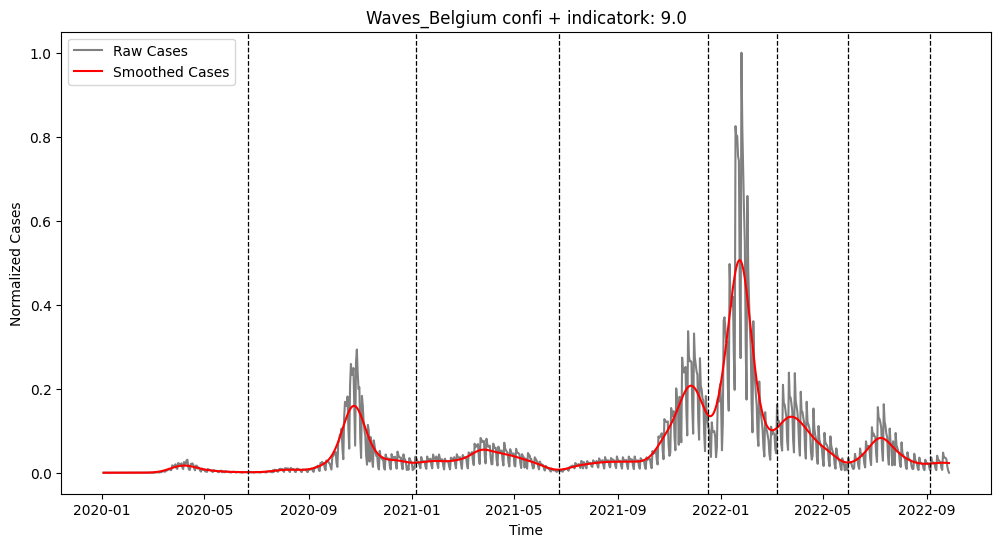

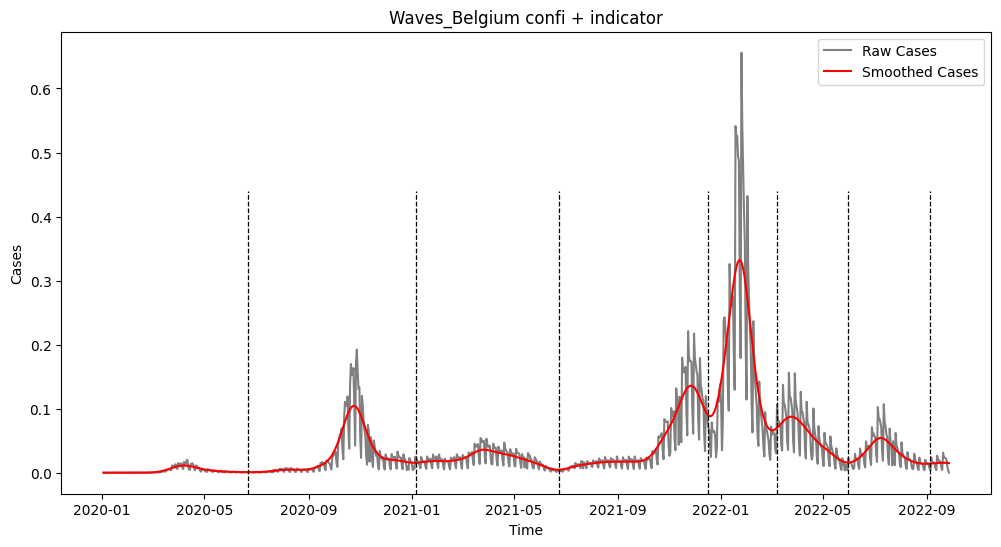

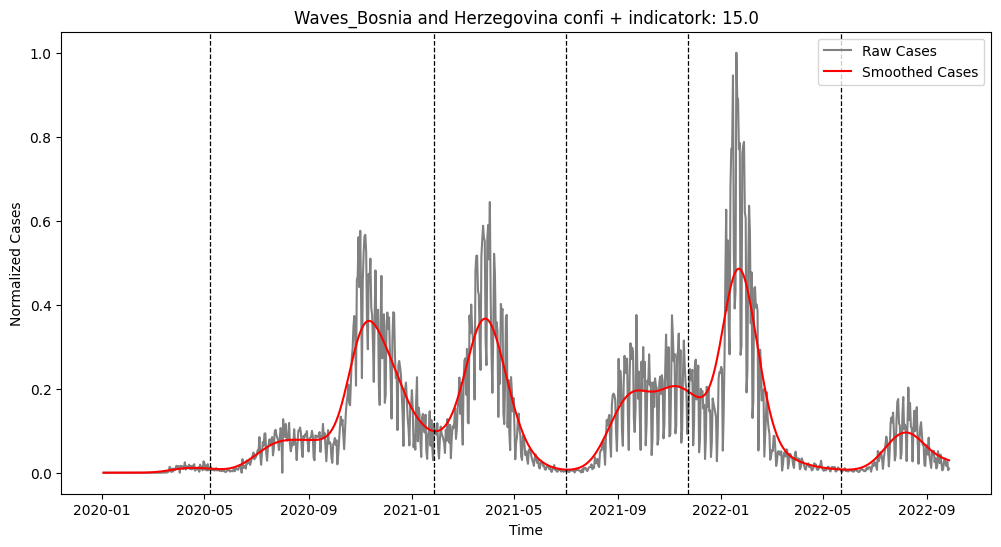

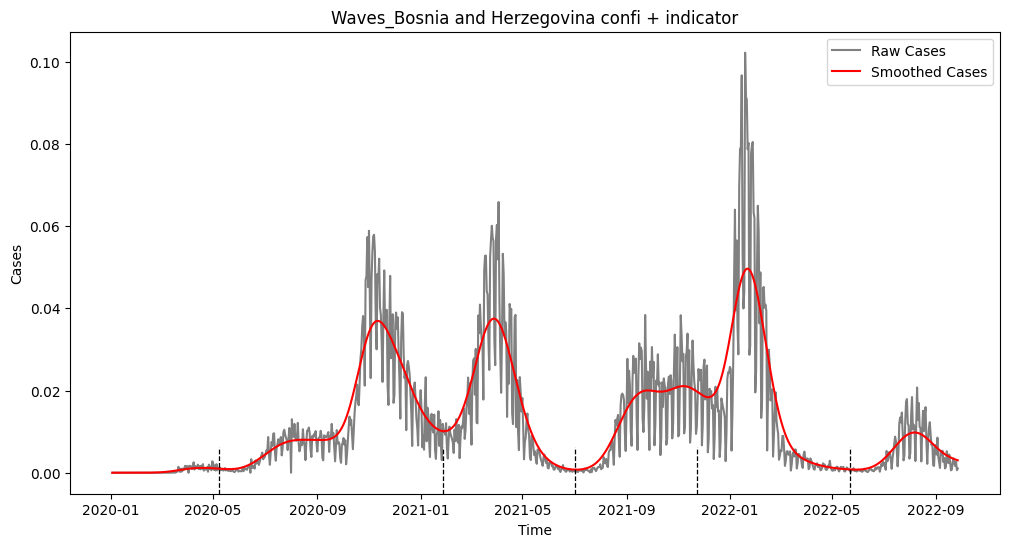

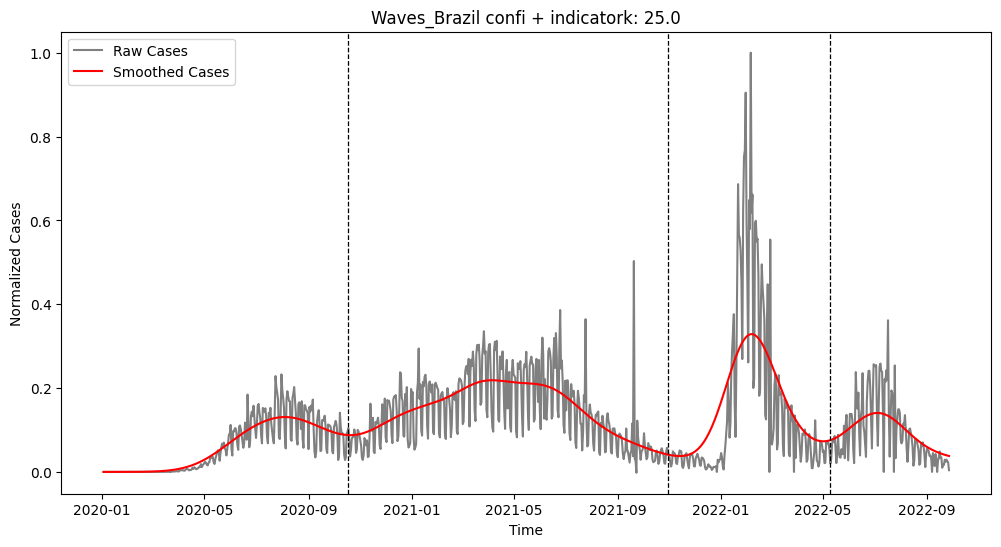

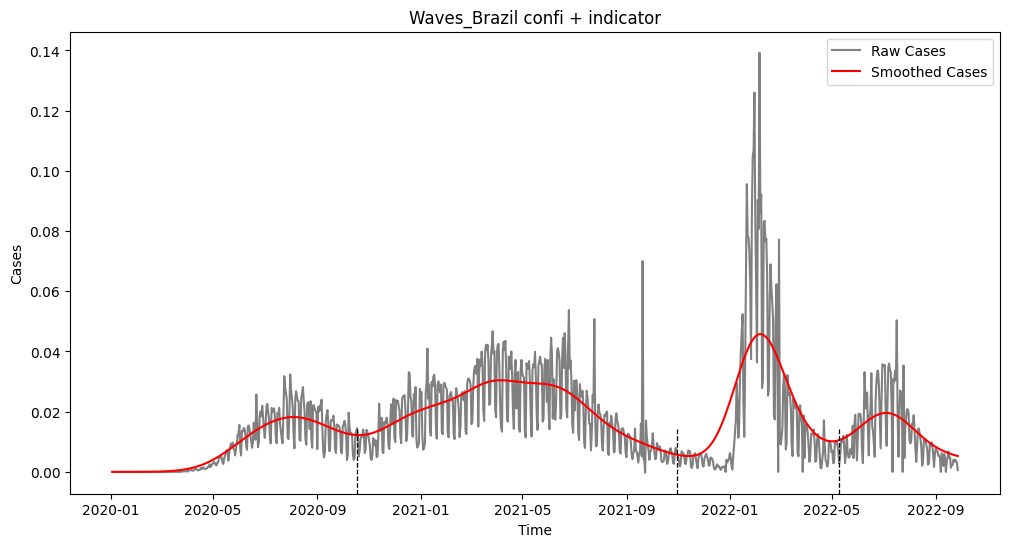

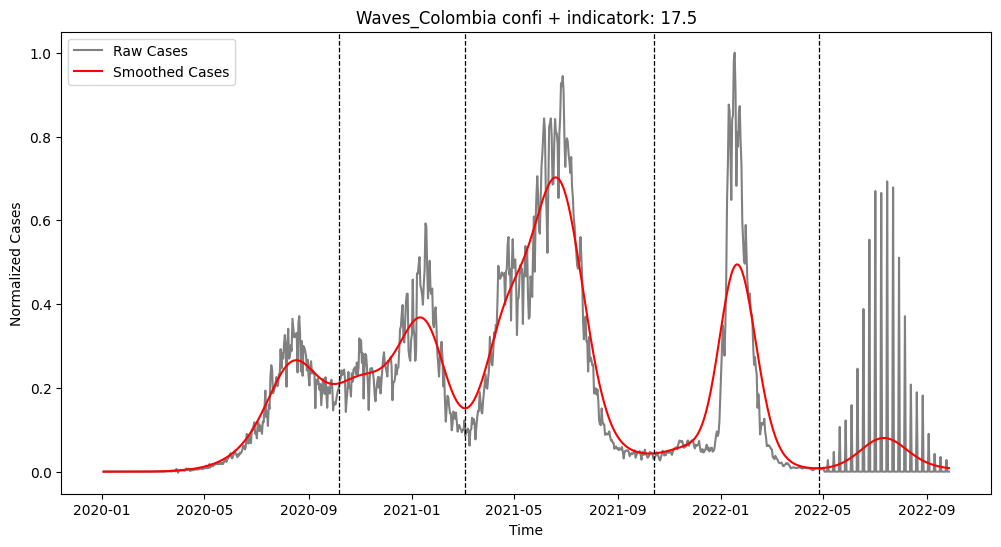

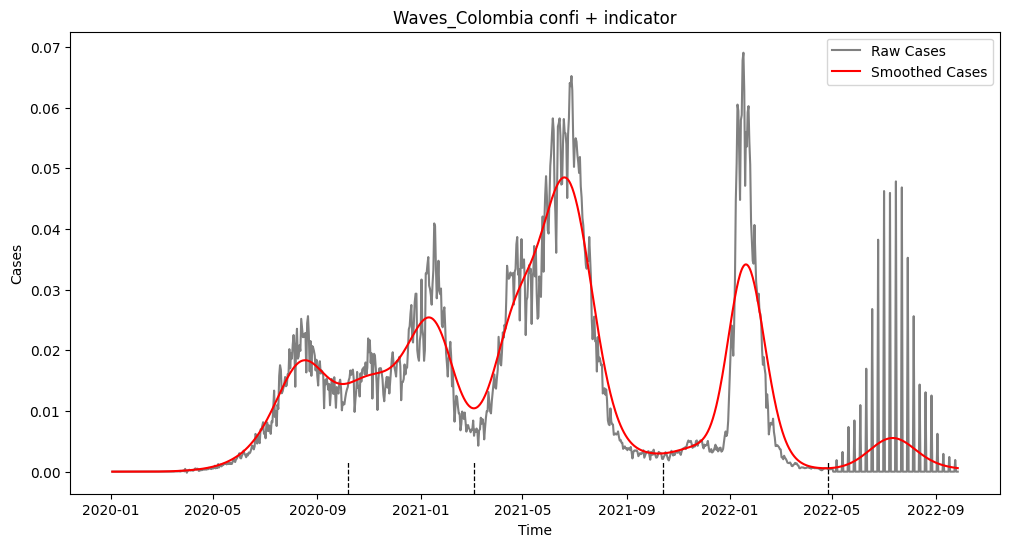

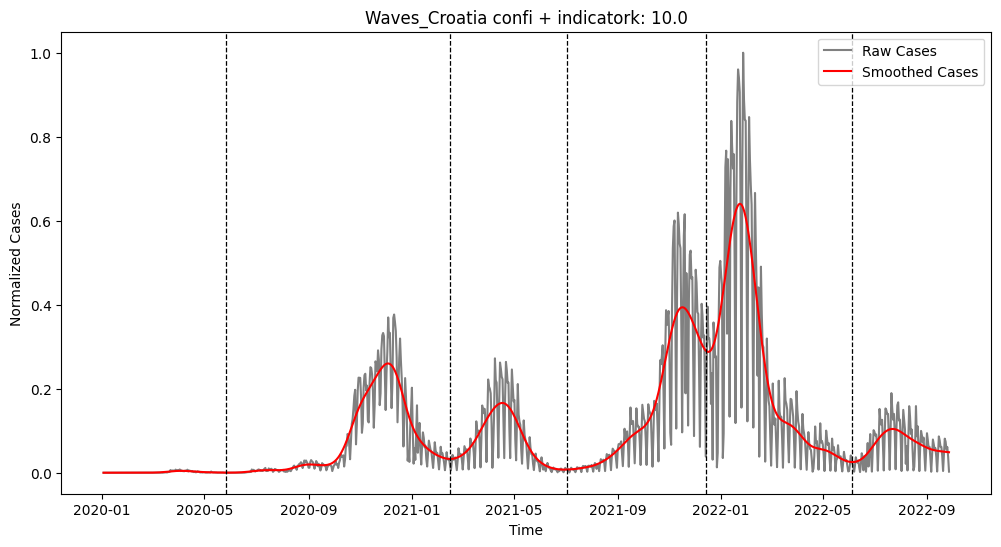

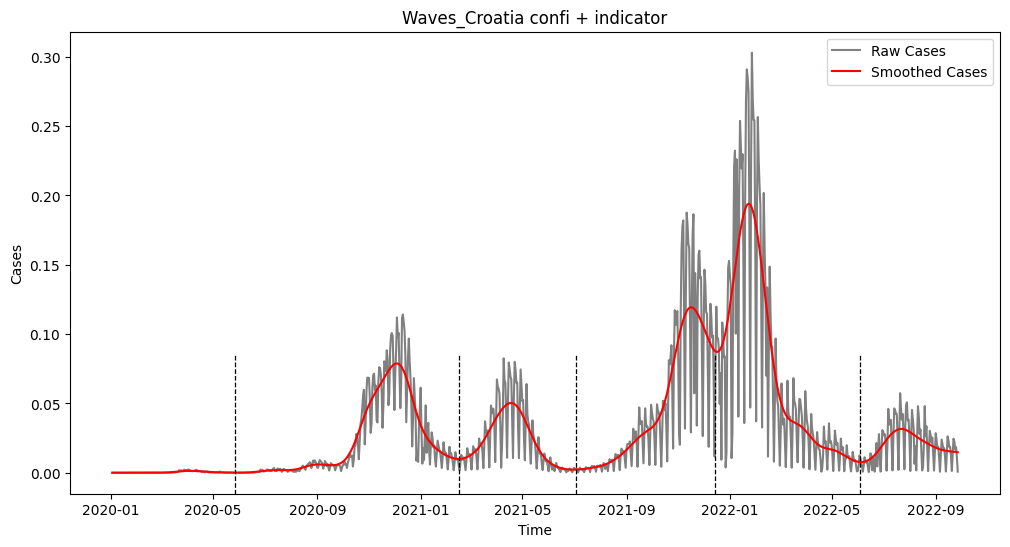

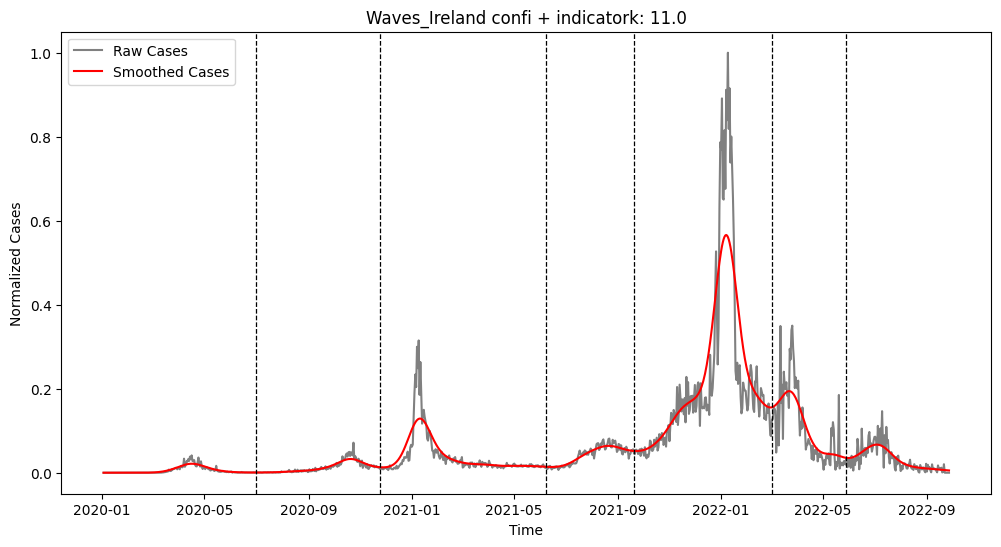

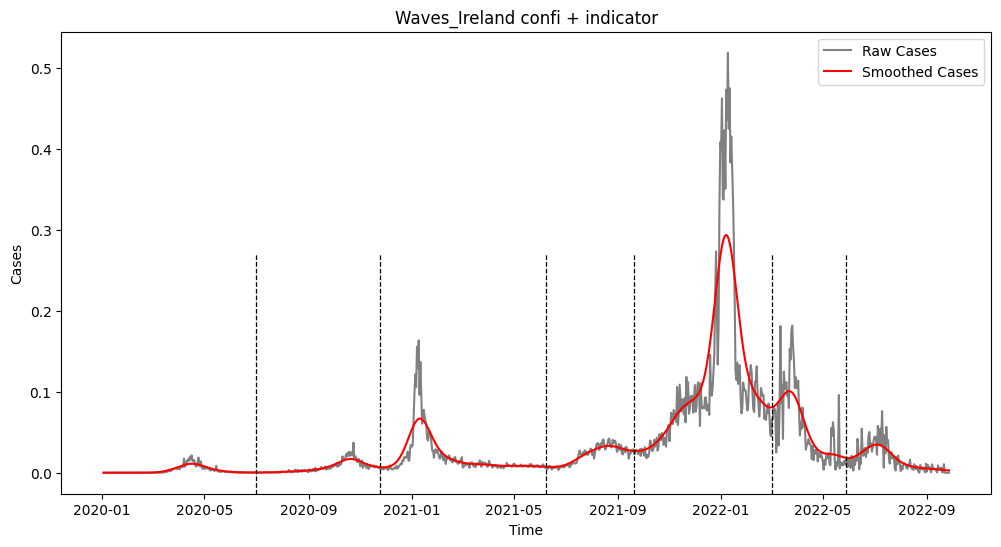

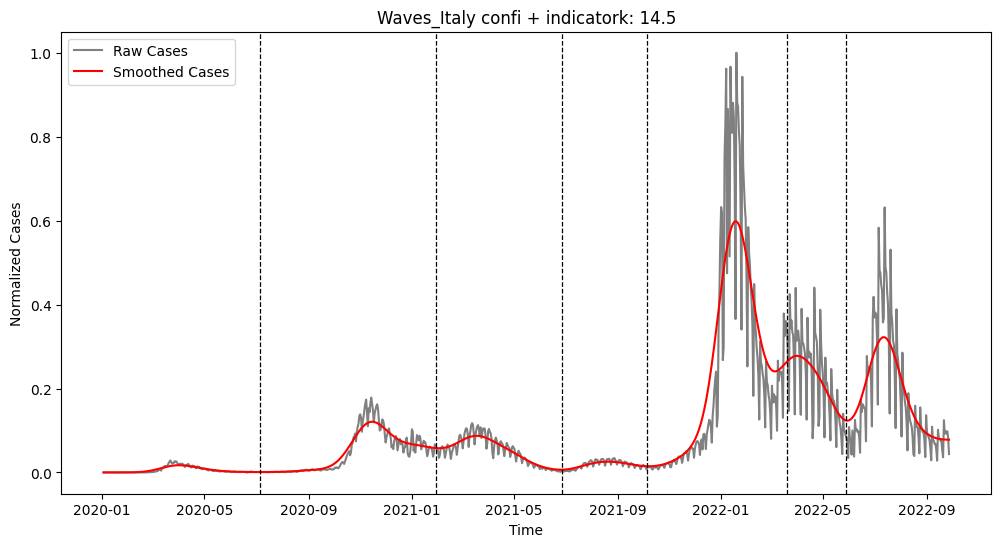

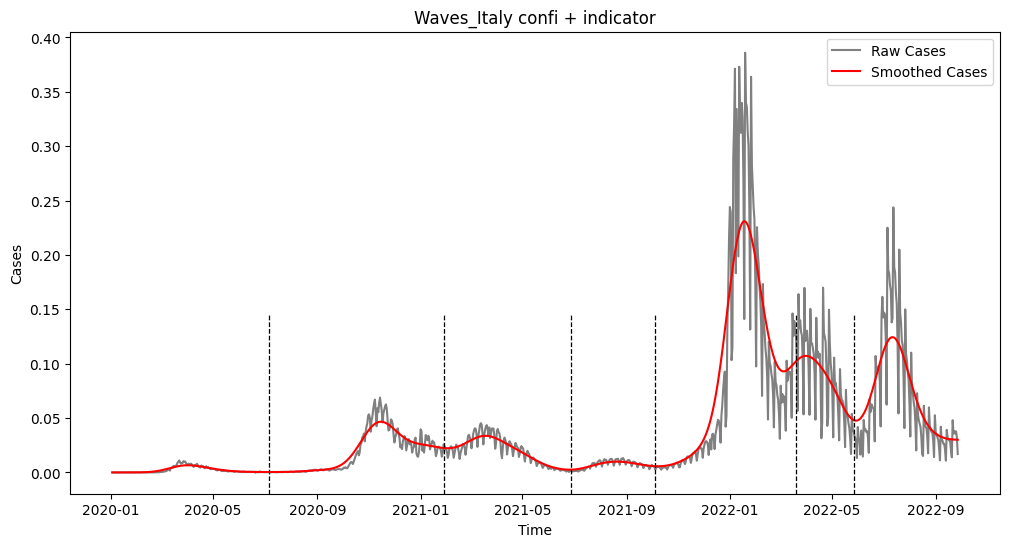

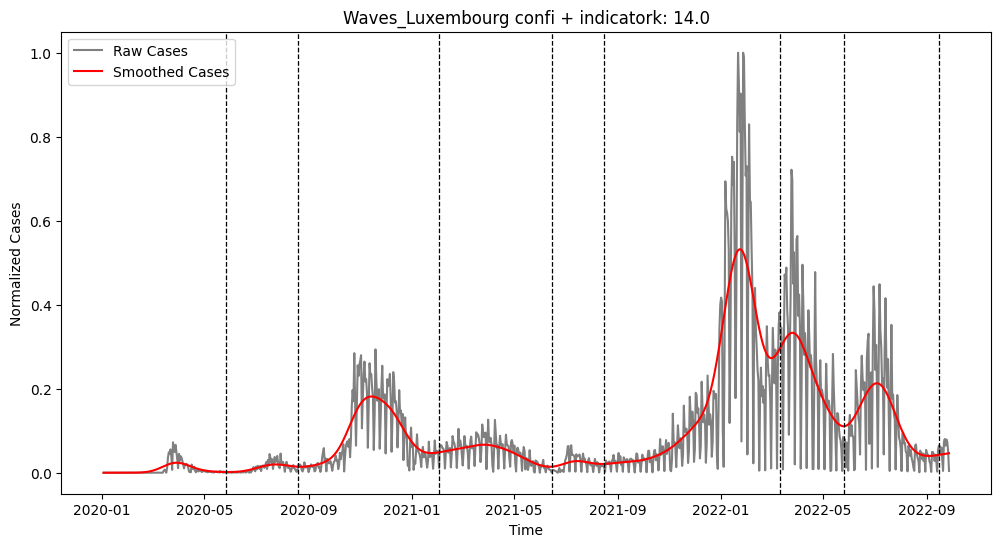

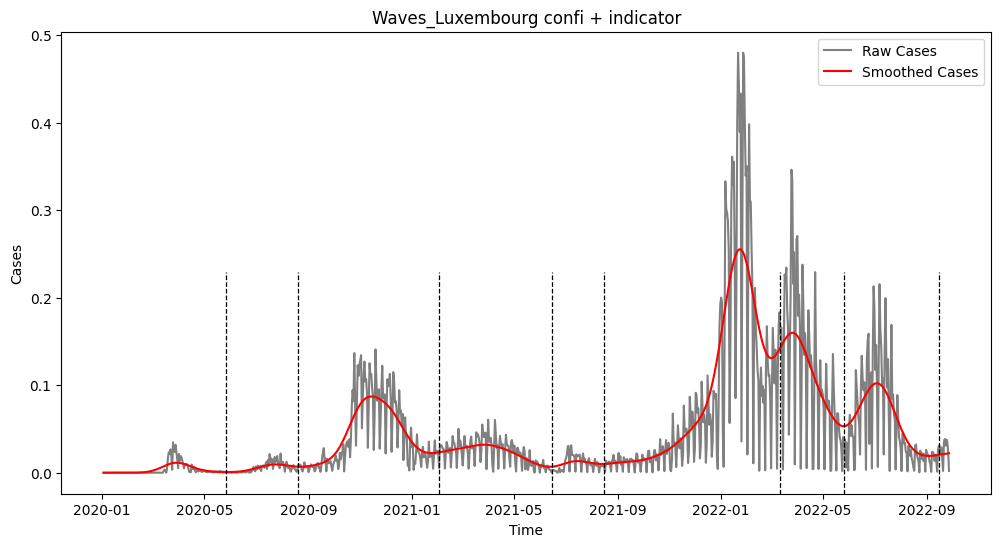

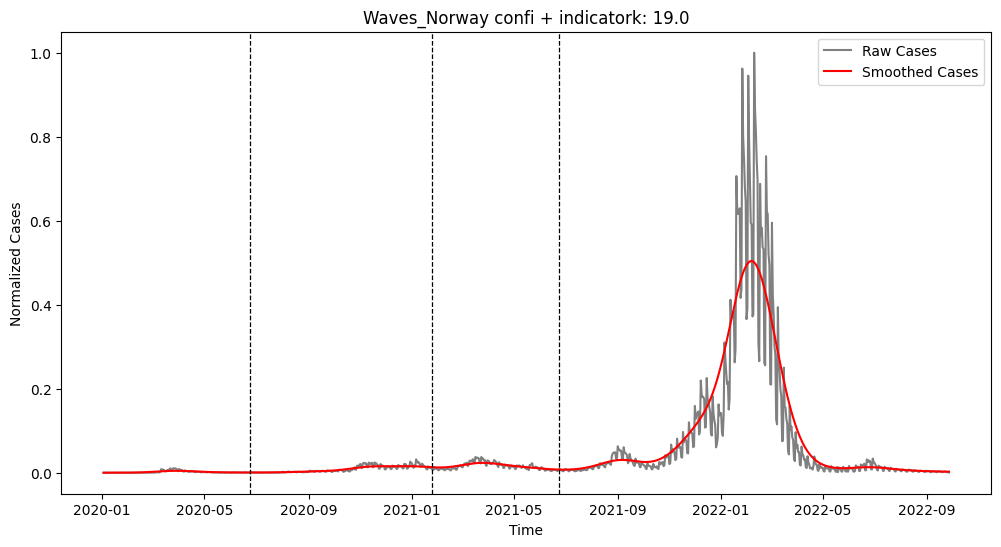

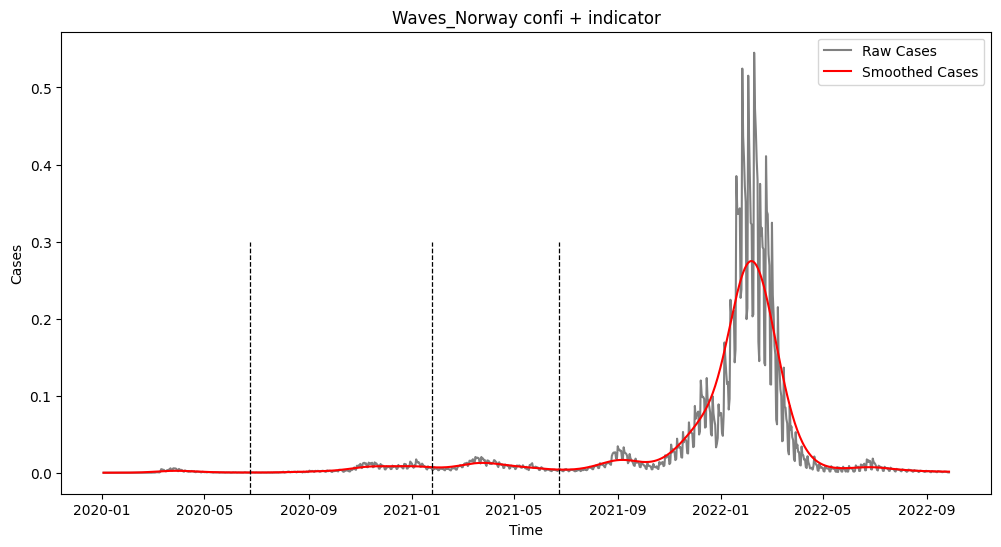

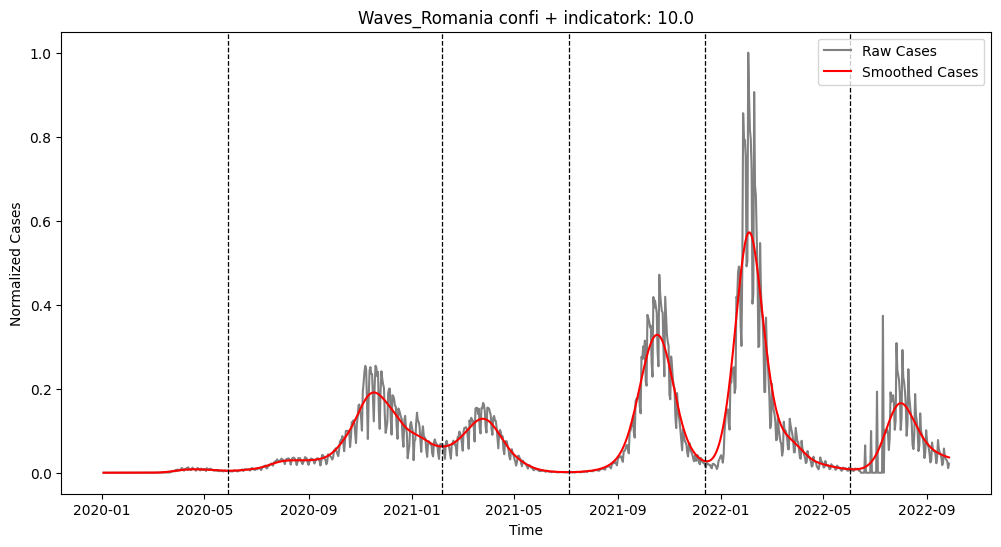

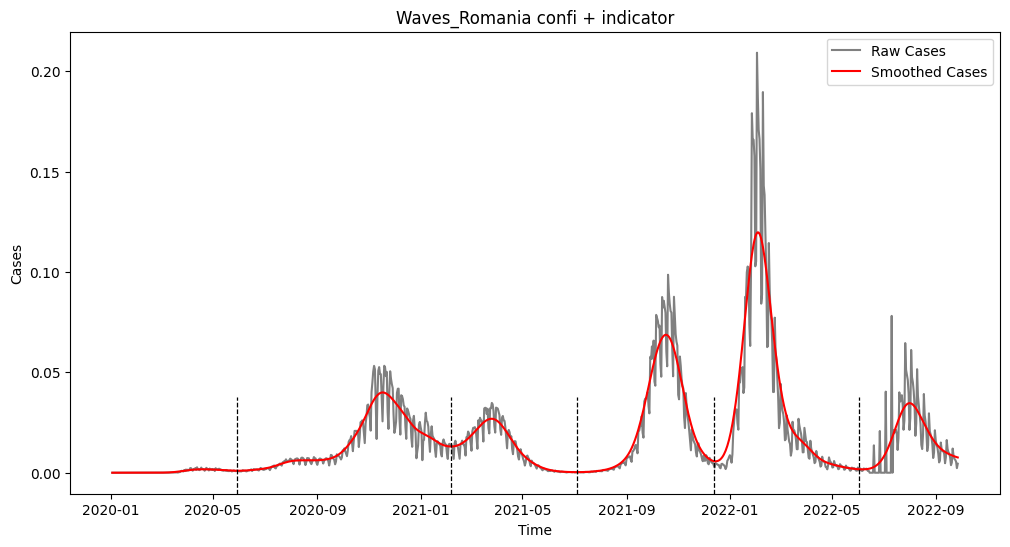

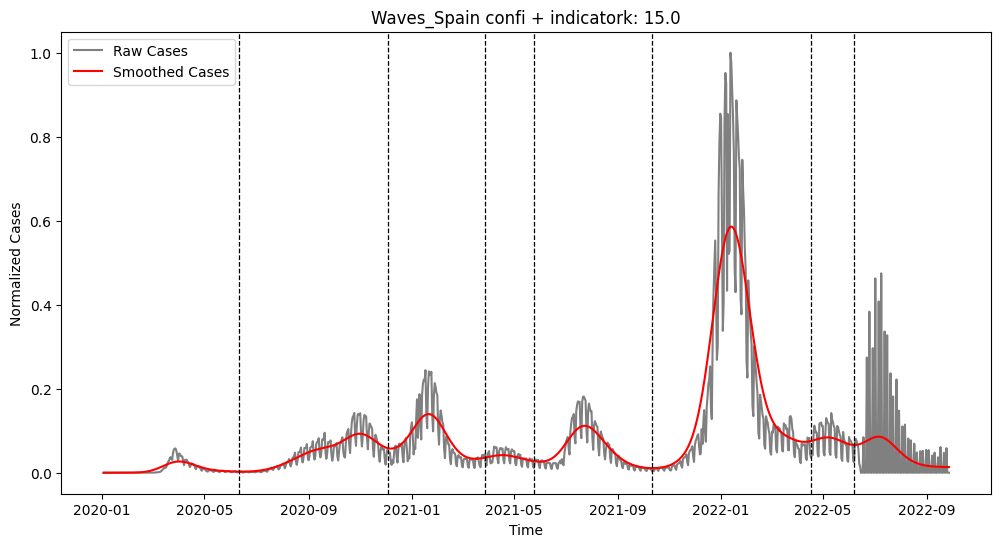

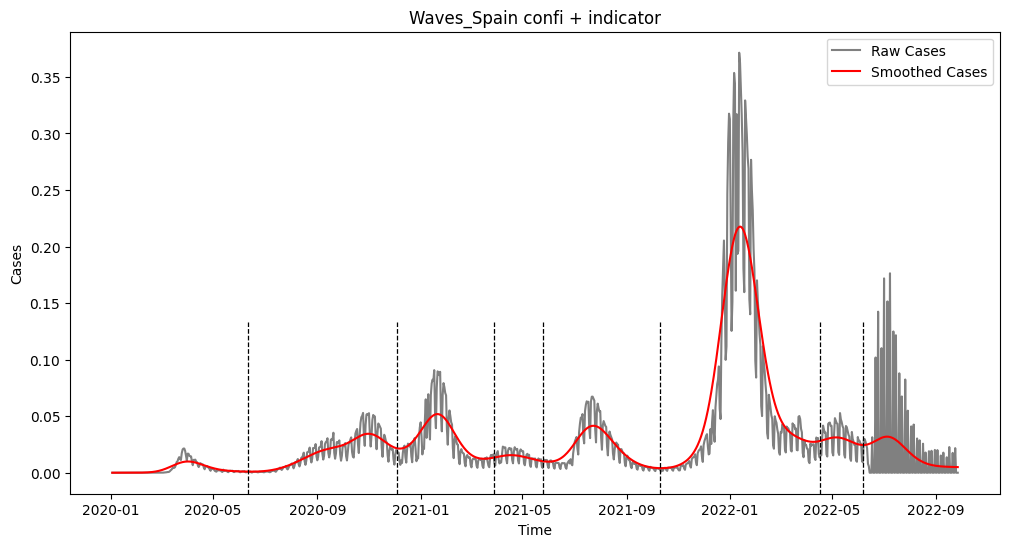

In [88]:
df.groupby("Country").apply(lambda x : kabu2(
    x[["Date_reported","Indicator"]],
    datesName,
    casesName,
    x["Country_code"].iloc[0],
    "Waves_"+ x["Country"].iloc[0]+" confi + indicator",
    outFolder,
    "Waves_"+ x["Country"].iloc[0]+" confi + indicator",
    0))

Estimating the sizes of the waves: 
1. sum: It counts the Indicator values since the start to the end of each wave
2. max: The maximum value inside the wave
3. max: The maximum value normalized by its maximum value

In [89]:
dfs = df.groupby("Country").apply(lambda x : pd.read_csv("/Users/linaruiz/Documents/projectEpidemicCurve/kabu/Kabu/dataframes/" + "Waves_"+ x["Country"].iloc[0]+" confi + indicator" + ".csv"))
dfs

Unnamed: 0 Date_reported  Indicator  SmoothedCases  CutDays
Country                                                                 
Belgium 0             0    2020-01-03   0.000000   1.322949e-09        0
        1             1    2020-01-04   0.000000   1.799952e-09        0
        2             2    2020-01-05   0.000000   2.436859e-09        0
        3             3    2020-01-06   0.000000   3.281764e-09        0
        4             4    2020-01-07   0.000000   4.394810e-09        0
...                 ...           ...        ...            ...      ...
Spain   994       10984    2022-09-23   0.000000   5.048128e-03        0
        995       10985    2022-09-24   0.021735   5.028484e-03        0
        996       10986    2022-09-25   0.000000   5.009442e-03        0
        997       10987    2022-09-26   0.000000   4.990876e-03        0
        998       10988    2022-09-27   0.000000   4.972674e-03        0

[10989 rows x 5 columns]

In [68]:
dfs.index

MultiIndex([(                 'Belgium',   0),
            (                 'Belgium',   1),
            (                 'Belgium',   2),
            (                 'Belgium',   3),
            (                 'Belgium',   4),
            (                 'Belgium',   5),
            (                 'Belgium',   6),
            (                 'Belgium',   7),
            (                 'Belgium',   8),
            (                 'Belgium',   9),
            ...
            ('United States of America', 989),
            ('United States of America', 990),
            ('United States of America', 991),
            ('United States of America', 992),
            ('United States of America', 993),
            ('United States of America', 994),
            ('United States of America', 995),
            ('United States of America', 996),
            ('United States of America', 997),
            ('United States of America', 998)],
           names=['Country', None], length=

In [90]:
def group (name):
    d = pd.read_csv("/Users/linaruiz/Documents/projectEpidemicCurve/kabu/Kabu/dataframes/" + name + ".csv")
    d["Indicator"] = d["Indicator"]
    d["cunsum"] = (d['CutDays'] == 1).cumsum()
    n = d.groupby("cunsum")['Indicator'].agg(["max","sum"]) 
    n["max/Max"] = n["max"]/n["max"].max()
    return n

In [92]:
dfs = df.groupby("Country").apply(lambda x : group("Waves_"+ x["Country"].iloc[0]+" confi + indicator") )
dfs.to_csv("/Users/linaruiz/Documents/projectEpidemicCurve/data/wavesSizes.csv")
dfs

max        sum   max/Max
Country cunsum                               
Belgium 0       0.020245   0.529787  0.030868
        1       0.192320   5.148259  0.293231
        2       0.054214   3.639953  0.082660
        3       0.221039   7.773102  0.337020
        4       0.655864  14.027575  1.000000
...                  ...        ...       ...
Spain   3       0.023091   0.833464  0.062179
        4       0.067292   2.772925  0.181198
        5       0.371372  14.250602  1.000000
        6       0.052748   1.528994  0.142036
        7       0.176340   1.953300  0.474834

[70 rows x 3 columns]